In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from peakdetect.utils.dataset import DPdataset
from peakdetect.utils.dataset_no_simulation import DPdataset_no_simulation

cif = 'simulation_data/Acetaminophen_orthorhombic.cif'
euler_angles = 'simulation_data/anglefile_Acetaminophen_orthorhombic_3_degree.txt'
save_path_dp_image='simulation_data/Acetaminophen_orthorhombic_3_degree_dp_images'

dp_dataset = DPdataset(cif, euler_angles, pattern_size=128, reciprocal_radius=0.5, minimum_intensity=0.05)


In [ ]:
dp_dataset.create_datasets(save_folder_path='simulation_data/train_valid_data', data_name='Acetaminophen_orthorhombic_3_degree', test_size=0.05)

Preparing class data ...
Preparing training data ...
Preparing validation data ...


In [2]:
from peakdetect.utils.dataset import DPdataset
from peakdetect.utils.dataset_no_simulation import DPdataset_no_simulation

dp_dataset_no_simulation = DPdataset_no_simulation(struct_filename='simulation_data/Acetaminophen_orthorhombic.cif', 
                                                   euler_angle_filename='simulation_data/train_valid_data/Acetaminophen_orthorhombic_5_degree_euler_angles_train.csv',
                                                   dp_image_path='simulation_data/train_valid_data/Acetaminophen_orthorhombic_5_degree_dp_images_train',
                                                   targets_path='simulation_data/train_valid_data/Acetaminophen_orthorhombic_5_degree_targets_train',
                                                   pattern_size=128, 
                                                   reciprocal_radius=0.5)

In [4]:
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(dp_dataset.__getitem__(0)[0])
plt.show()

im.fromarray(dp_dataset.__getitem__(0)[0]).save('test.tif')
np.array(im.open('test.tif'), dtype=np.uint8)

plt.imshow(np.array(im.open('test.tif')))
plt.show()

NameError: name 'dp_dataset' is not defined

In [3]:
dp_images, targets = dp_dataset.create_datasets()

In [7]:
import numpy as np
import pandas as pd
imgs_filename = 'simulation_data/Acetaminophen_orthorhombic_5_degree_dp_images.npy'
np.save(imgs_filename,dp_images)

targets_filename =  'simulation_data/Acetaminophen_orthorhombic_5_degree_targets.csv'
targets.to_csv(targets_filename)

In [11]:
with open('simulation_data/class_names.txt', 'w') as f:
    for hkl in dp_dataset.hkls:
        f.write(hkl+'\n')  


In [12]:
dp_dataset.num_hkls

86

In [132]:
dp_images = []
targets=[]
for idx in range(5):
    img, target, _ = dp_dataset.__getitem__(idx)
    dp_images.append(img)
    targets.append(target)

# imgs = np.stack(imgs)
# targets = pd.concat(targets)

In [133]:
hkls = sorted(pd.concat(targets)['hkl'].unique())
hkls_dict = dict()
for i, idx in enumerate(hkls): hkls_dict[idx]=i

for i, (dp_image, target) in enumerate(zip(dp_images, targets)):
    target['hkl_id'] = target['hkl'].apply(lambda x: hkls_dict[x])
    boxes = target[['hkl_id', 'bx', 'by', 'bw', 'bh']].to_numpy()
    dp_image, bb_target = dp_dataset.transform((dp_image[:,:,np.newaxis], boxes))

    dp_image = dp_image.numpy()
    bb_target = bb_target.numpy()
    bb_target[:,0] = np.ones((bb_target.shape[0]))*i

    dp_images[i]=dp_image
    targets[i]=bb_target


dp_imgs = np.stack(dp_images)
targets = np.concatenate(targets,axis=0)
targets_df = pd.DataFrame(targets, columns=['id','class','bx','by','bw','bh'])

targets_df

,id,class,bx,by,bw,bh
0,0.0,7.0,0.210938,0.171875,0.03125,0.03125
1,0.0,3.0,0.351562,0.335938,0.06250,0.06250
2,0.0,2.0,0.484375,0.328125,0.03125,0.03125
3,0.0,3.0,0.625000,0.320312,0.03125,0.03125
4,0.0,0.0,0.226562,0.507812,0.06250,0.06250
5,0.0,0.0,0.765625,0.484375,0.06250,0.06250
6,0.0,3.0,0.367188,0.671875,0.03125,0.03125
7,0.0,2.0,0.507812,0.664062,0.03125,0.03125
8,0.0,3.0,0.640625,0.656250,0.06250,0.06250
9,1.0,0.0,0.226562,0.515625,0.03125,0.03125


In [68]:
imgs_filename = 'simulation_data/Acetaminophen_orthorhombic_5_degree_dp_images.npy'
np.save(imgs_filename,imgs)

targets_filename =  'simulation_data/Acetaminophen_orthorhombic_5_degree_targets.csv'
targets.to_csv(targets_filename, index=0)

In [44]:
profile_simulation = dp_dataset.ediff.calculate_profile_data(dp_dataset.struct,  
                                                            dp_dataset.reciprocal_radius, 
                                                            minimum_intensity=1e-2)

In [59]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'magnitude':profile_simulation.magnitudes,
                    'intensity': profile_simulation.intensities,
                    'hkl':profile_simulation.hkls})
df[df['magnitude']<=0.75]

,magnitude,intensity,hkl
1242,0.749937,0.261031,851
1245,0.729284,0.373110,841
1246,0.716630,4.319837,840
1249,0.712807,1.414127,831
1250,0.738925,10.815569,822
...,...,...,...
1507,0.246123,100.000000,221
1508,0.205623,25.878569,220
1509,0.224485,5.323961,211
1510,0.169420,22.952816,200


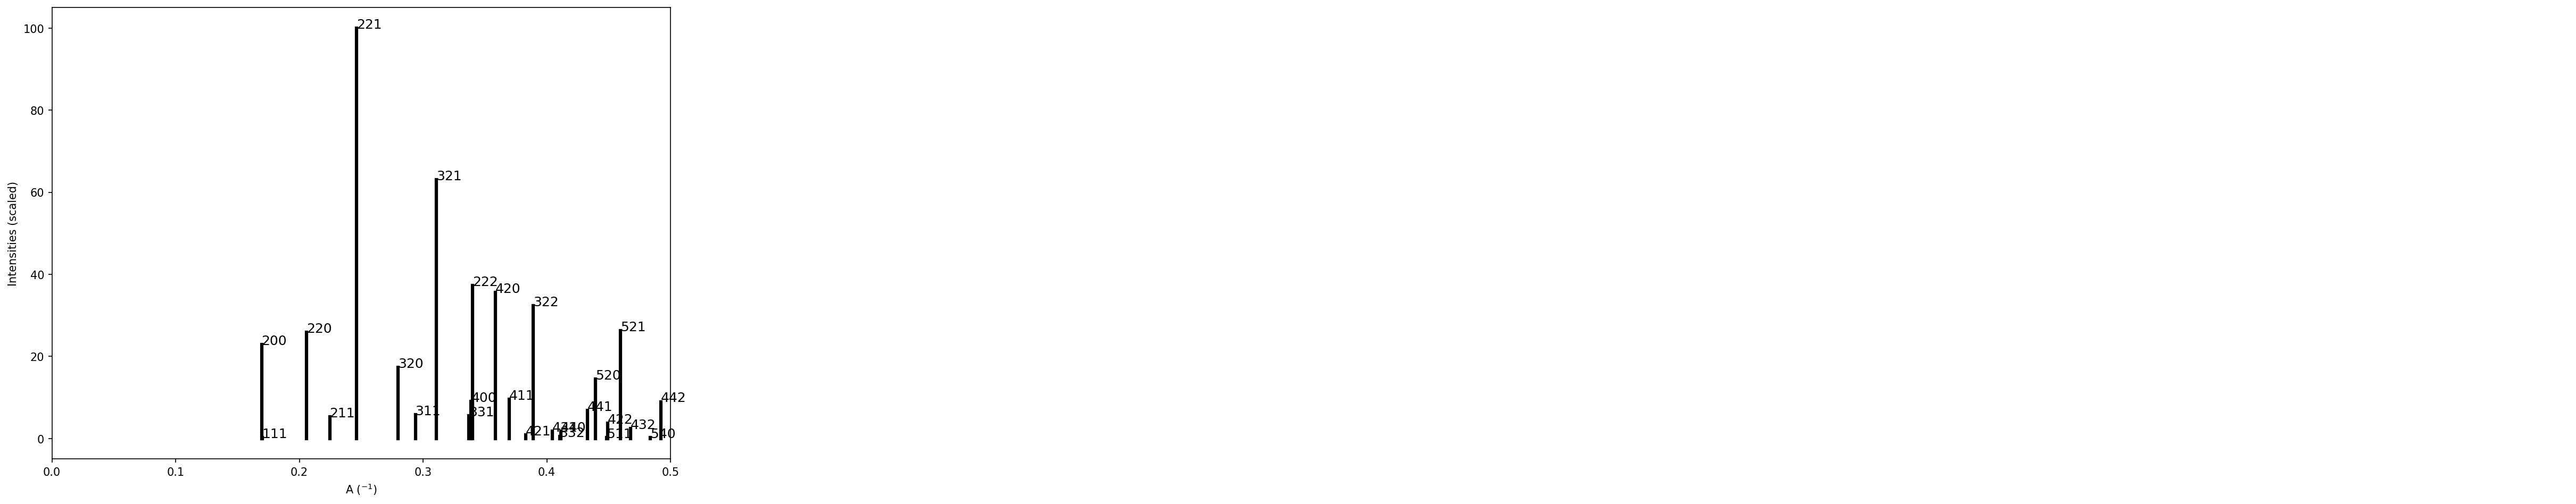

In [83]:
fig, axs = plt.subplots(1,1,figsize=(10,7.5),dpi=150)
for g, i, hkls in zip(profile_simulation.magnitudes, profile_simulation.intensities, profile_simulation.hkls):
    label = hkls
    axs.plot([g, g], [0, i], color="k", linewidth=3, label=label)
    axs.annotate(label, xy=[g, i], xytext=[g, i], fontsize=12)

    axs.set_xlabel("A ($^{-1}$)")
    axs.set_ylabel("Intensities (scaled)")
    axs.set_xlim(0.0,0.5)
plt.show()


In [12]:
from diffsims.generators.diffraction_generator import DiffractionGenerator
from diffsims.utils.shape_factor_models import sinc

ediff = DiffractionGenerator(accelerating_voltage=200.0, shape_factor_model=sinc, minimum_intensity=1e-2)

In [1]:
from peakdetect.data_module import DPDataModule
from peakdetect.lightning_module import EDPeakDector
from pytorch_lightning.callbacks.progress import TQDMProgressBar
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

args = dict(model='peakdetect/peakdetect_Resnet.cfg',
            data = 'peakdetect/data.cfg',
            checkpoint_path='checkpoints/orth_5_degree',
            model_name='orth_5_degree_Resnet',
            version=1,
            test_data_ratio=0.05,
            batch_size=32,
            precision_for_training=16,
            num_epoch=30,
            verbose='store_true',
            n_cpu=4,
            iou_thres=0.5,
            conf_thres=0.1,
            nms_thres=0.5,
            seed=0)

# Set Logger
logger = TensorBoardLogger(save_dir="lightning_logs",
                           name=args['model_name'],
                           version=args['version'])

# Set checkpoints paths
checkpoint_callback = ModelCheckpoint(
    save_top_k=5,
    monitor="precision",
    every_n_epochs=5,
    mode="max",
    dirpath=args['checkpoint_path'],
    filename= args['model_name'] + "-{epoch:02d}-{precission:.2f}",
)

In [ ]:
model = EDPeakDector(args)
data_module = DPDataModule(args, simulation=False)
trainer = pl.Trainer(max_epochs=args['num_epoch'], 
                     callbacks=[TQDMProgressBar(refresh_rate=10),checkpoint_callback],
                     logger=logger,
                     precision=args['precision_for_training'],
                     accelerator='gpu', 
                     devices=1)

trainer.fit(model, data_module)

In [ ]:
import hydra
from hydra.core.config_store import ConfigStore
from peakdetect.config import PeakConfig

cs = ConfigStore.instance()
cs.store(name="peak_config", node=PeakConfig)

@hydra.main(config_path='conf', config_name='config.yaml')
def main(cfg:PeakConfig):
    print(cfg)

main()

In [7]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 44724), started 12:59:18 ago. (Use '!kill 44724' to kill it.)

In [28]:
PATH='checkpoints/orth_5_degree_Resnet/orth_5_degree_Resnet-epoch=144-precission=0.00.ckpt'
model = EDPeakDector.load_from_checkpoint(checkpoint_path=PATH,args=args)

# model.eval()

In [30]:
from peakdetect.utils.utils import xywh2xyxy, non_max_suppression
import torch
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator

def detect_sigle_dp(classes, img, model, targets):
    model.eval().cuda()

    img = img.unsqueeze(0).to(device='cuda', dtype=torch.float)
    outputs = model(img)
    outputs = non_max_suppression(outputs, conf_thres=model.args['conf_thres'], iou_thres=model.args['iou_thres'])

    targets[:, 2:] = xywh2xyxy(targets[:, 2:])
    targets[:, 2:] *= img.size(3)
    targets = targets.cpu()

    detections_pred = outputs[0].cpu()
    detections_target = targets.cpu()
    num_detections_target = detections_target.size(0)
    detections_target = torch.cat((detections_target, torch.ones(num_detections_target,1)),axis=1)
    detections_target = detections_target[:,[2,3,4,5,6,1]]

    # colors
    unique_labels = torch.cat((detections_pred,detections_target),axis=0)[:, -1].cpu().unique()
    n_cls_preds = len(unique_labels)

    # Bounding-box colors
    cmap = plt.get_cmap("tab20b")
    colors = [cmap(i) for i in np.linspace(0, 1, n_cls_preds)]
    bbox_colors = colors #random.sample(colors, n_cls_preds)

    fig, axs = plt.subplots(1,3, figsize=(9,3), dpi=150)
    for i in range(3):
        if i==0:
            axs[i].imshow(img.squeeze().cpu().detach().numpy())

        else:
            # model prediction
            if i==1:
                axs[i].imshow(img.squeeze().cpu().detach().numpy())
                detections = detections_pred.to("cpu")

            # ground truth
            elif i==2:
                axs[i].imshow(img.squeeze().cpu().detach().numpy())
                detections = detections_target.cpu()


            for x1, y1, x2, y2, conf, cls_pred in detections:

                box_w = x2 - x1
                box_h = y2 - y1

                color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
                # Create a Rectangle patch
                bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=0.5, edgecolor=color, facecolor="none")
                # Add the bbox to the plot
                axs[i].add_patch(bbox)
                # Add label
                if i==2:
                    axs[i].text(
                        x1,#-0.5*box_w,
                        y2,
                        fontsize=5,
                        s=classes[int(cls_pred)],
                        color="white",
                        verticalalignment="top",
                        horizontalalignment="left",
                        bbox={"color": color, "pad": 0})
                if i==1:
                    axs[i].text(
                        x1,#,
                        y2,
                        fontsize=5,
                        s=classes[int(cls_pred)]+f'\n{conf*100:.1f}%',
                        color="white",
                        verticalalignment="top",
                        horizontalalignment="left",
                        bbox={"color": color, "pad": 0})

        axs[i].axis("off")
        axs[i].xaxis.set_major_locator(NullLocator())
        axs[i].yaxis.set_major_locator(NullLocator())

    fig.subplots_adjust(wspace=0.1, hspace=0.00)
    plt.show()

In [27]:
model.model.yolo_layers.grid

AttributeError: 'list' object has no attribute 'grid'

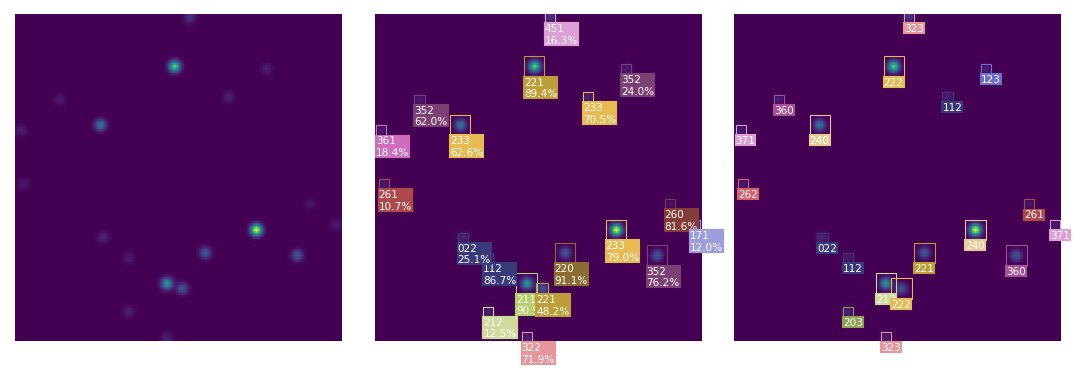

In [37]:
img, targets,_,_=data_module.valid.__getitem__(500)

detect_sigle_dp(model.class_names, img, model, targets)

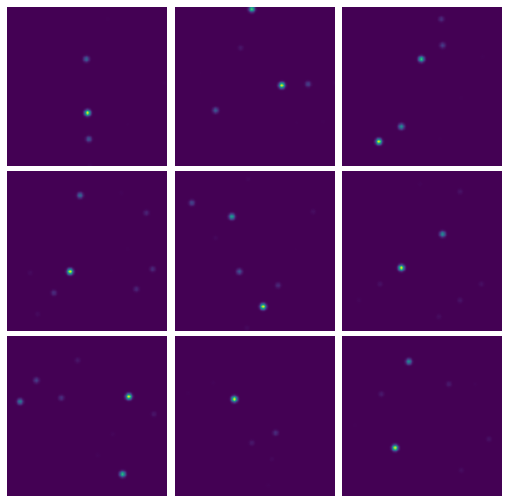

In [76]:
fig, axs = plt.subplots(3,3,figsize=(9,9))
for i in range(3):
    for j in range(3):
        img, _,_,_=data_module.valid.__getitem__(i+3*j)
        axs[i,j].imshow(img.cpu().numpy().squeeze())
        axs[i,j].axis("off")

fig.subplots_adjust(wspace=0.0, hspace=0.03)

In [3]:
model.model[]

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (maxpool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (conv_4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_4): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff